<b><h2> EDA </h2></b>

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("house_data.csv")
type(df)

pandas.core.frame.DataFrame

In [262]:
#unique cities
df['City'].unique()

array(['San Francisco', 'Chicago', 'Los Angeles', 'New York', nan],
      dtype=object)

In [263]:
df.head(3)

,Size (sq ft),Bedrooms,Bathrooms,Floors,Age (Years),City,Price
0,887.0,5.0,1.0,2.0,2.0,San Francisco,458015.0
1,2011.0,5.0,3.0,1.0,47.0,Chicago,612437.0
2,2020.0,1.0,1.0,1.0,6.0,Los Angeles,983474.0


In [264]:
df.tail(3)

,Size (sq ft),Bedrooms,Bathrooms,Floors,Age (Years),City,Price
103,3170.0,2.0,1.0,2.0,44.0,Los Angeles,790500.0
104,3285.0,4.0,2.0,1.0,15.0,San Francisco,87.0
105,2000.0,3.0,1.0,1.0,30.0,Chicago,692150.0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Size (sq ft)  101 non-null    float64
 1   Bedrooms      101 non-null    float64
 2   Bathrooms     102 non-null    float64
 3   Floors        102 non-null    float64
 4   Age (Years)   103 non-null    float64
 5   City          105 non-null    object 
 6   Price         104 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB


In [266]:
df.shape

(106, 7)

In [267]:
df.describe()

,Size (sq ft),Bedrooms,Bathrooms,Floors,Age (Years),Price
count,101.000000,101.000000,102.000000,102.000000,103.000000,104.000000
mean,2747.267327,2.940594,2.009804,1.411765,25.805825,664944.278846
std,754.960805,1.263501,0.802164,0.494583,11.412977,164393.939770
min,887.000000,1.000000,1.000000,1.000000,2.000000,87.000000
25%,2000.000000,2.000000,1.000000,1.000000,17.000000,580695.250000
50%,2815.000000,3.000000,2.000000,1.000000,26.000000,680999.000000
75%,3495.000000,4.000000,3.000000,2.000000,35.000000,764505.000000
max,4011.000000,5.000000,3.000000,2.000000,48.000000,983474.000000


In [268]:
df.describe(include = ['object'])

,City
count,105
unique,4
top,Chicago
freq,33


In [269]:
df.dtypes

Size (sq ft)    float64
Bedrooms        float64
Bathrooms       float64
Floors          float64
Age (Years)     float64
City             object
Price           float64
dtype: object

In [270]:
df['City'] = df['City'].astype('category')

In [271]:
df.dtypes

Size (sq ft)     float64
Bedrooms         float64
Bathrooms        float64
Floors           float64
Age (Years)      float64
City            category
Price            float64
dtype: object

In [272]:
df.duplicated().sum()

0

In [273]:
df.columns

Index(['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Floors', 'Age (Years)',
       'City', 'Price'],
      dtype='object')

<h4>Handling missing values</h4>

In [274]:
df.isna().sum()

Size (sq ft)    5
Bedrooms        5
Bathrooms       4
Floors          4
Age (Years)     3
City            1
Price           2
dtype: int64

In [275]:
rows_with_missing_values = df[df.isna().any(axis = 1)]
rows_with_missing_values

,Size (sq ft),Bedrooms,Bathrooms,Floors,Age (Years),City,Price
25,NaN,5.0,1.0,2.0,18.0,Chicago,527000.0
26,1900.0,NaN,2.0,1.0,22.0,Los Angeles,689435.0
27,3500.0,2.0,NaN,2.0,33.0,New York,923654.0
28,2100.0,4.0,3.0,NaN,41.0,San Francisco,598742.0
29,3950.0,1.0,1.0,2.0,NaN,Chicago,782611.0
30,2770.0,3.0,2.0,1.0,17.0,NaN,674128.0
31,3675.0,5.0,3.0,2.0,28.0,New York,NaN
36,1785.0,2.0,NaN,1.0,19.0,Chicago,682455.0
37,NaN,1.0,1.0,2.0,8.0,San Francisco,416789.0
38,1980.0,4.0,2.0,1.0,37.0,Los Angeles,NaN


In [276]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
columns = ['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Floors', 'Age (Years)', 'Price']
for i in columns:
    df[[i]] = imputer.fit_transform(df[[i]])

In [277]:
rows_with_missing_values = df[df.isna().any(axis = 1)]
rows_with_missing_values

,Size (sq ft),Bedrooms,Bathrooms,Floors,Age (Years),City,Price
30,2770.0,3.0,2.0,1.0,17.0,NaN,674128.0


In [278]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
columns = ['City']
for i in columns:
    df[[i]] = imputer.fit_transform(df[[i]])

In [279]:
df.isnull().sum()

Size (sq ft)    0
Bedrooms        0
Bathrooms       0
Floors          0
Age (Years)     0
City            0
Price           0
dtype: int64

<h4> Outlier Detection </h4>

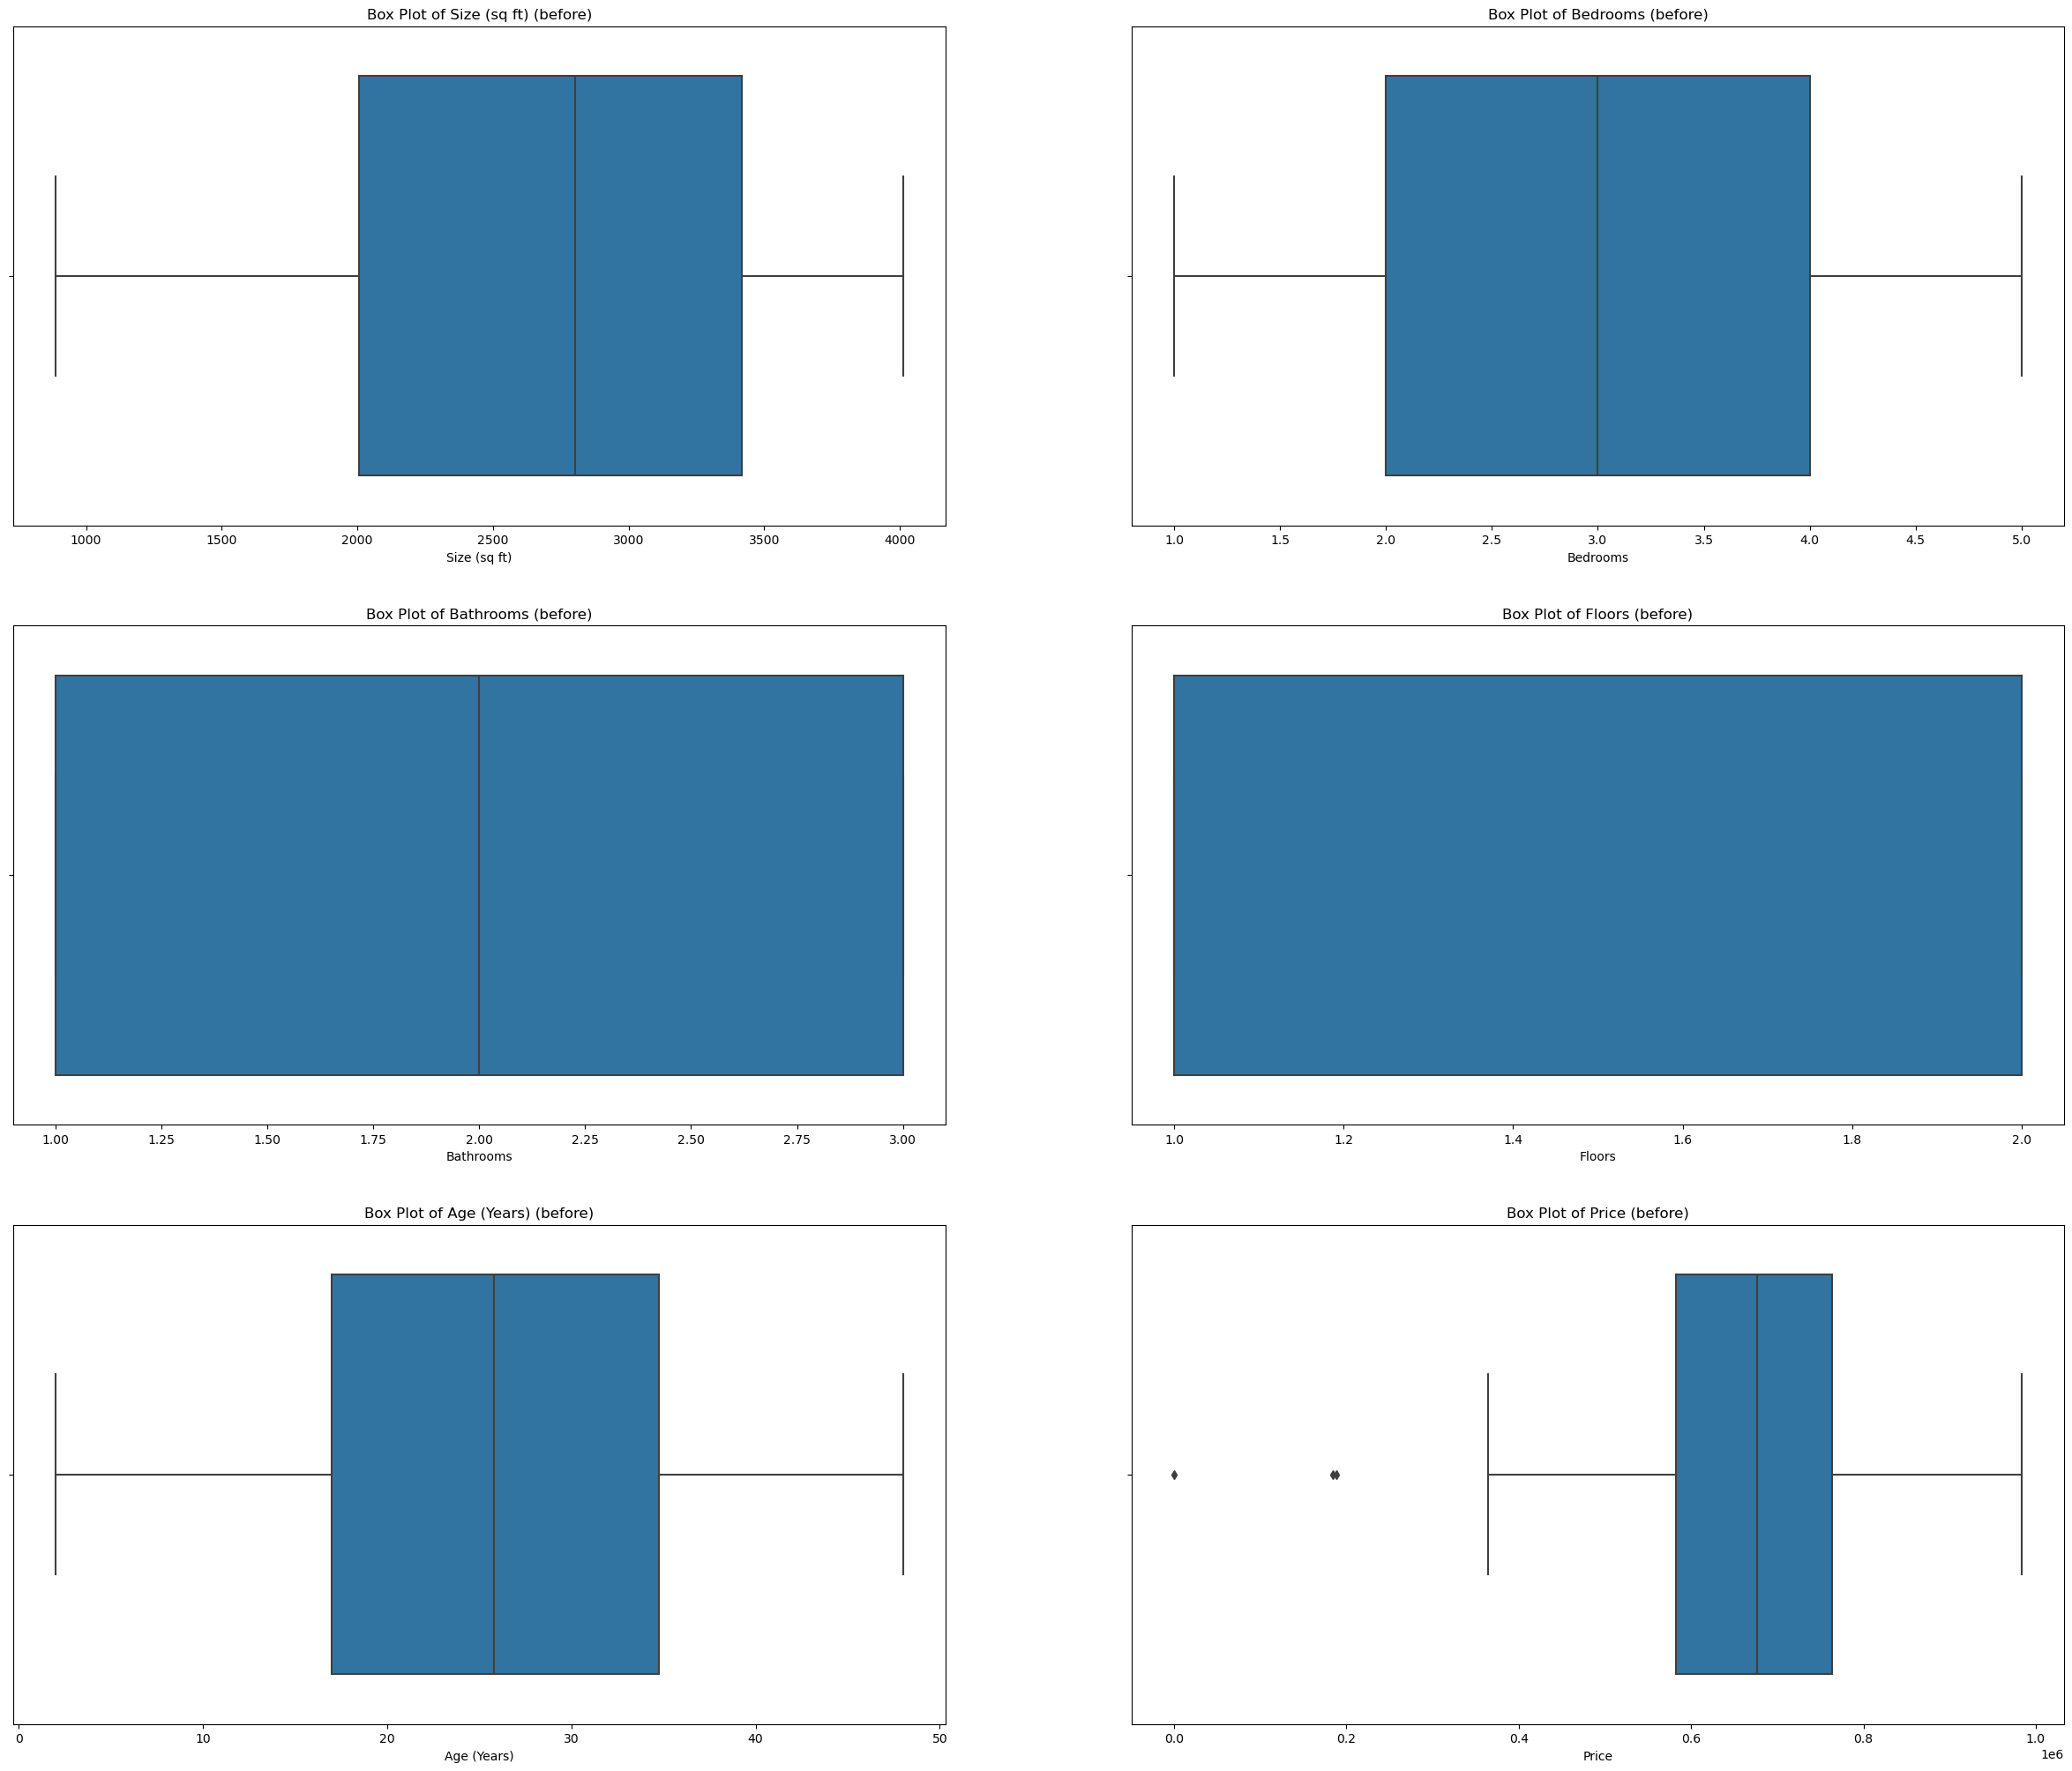

In [280]:
import seaborn as sns
columns = ['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Floors', 'Age (Years)', 'Price']
fig, axes = plt.subplots(3, 2, figsize = (30, 25))
axes = axes.flatten()
for i, j in enumerate(columns):
    sns.boxplot(x = df[j], ax = axes[i])
    axes[i].set_title(f"Box Plot of {j} (before)")


In [281]:
numeric_df = df.select_dtypes(include = ['float64'])
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

iqr = q3 - q1

ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr

new_df = df[~((numeric_df < lb) | (numeric_df > ub)).any(axis=1)]

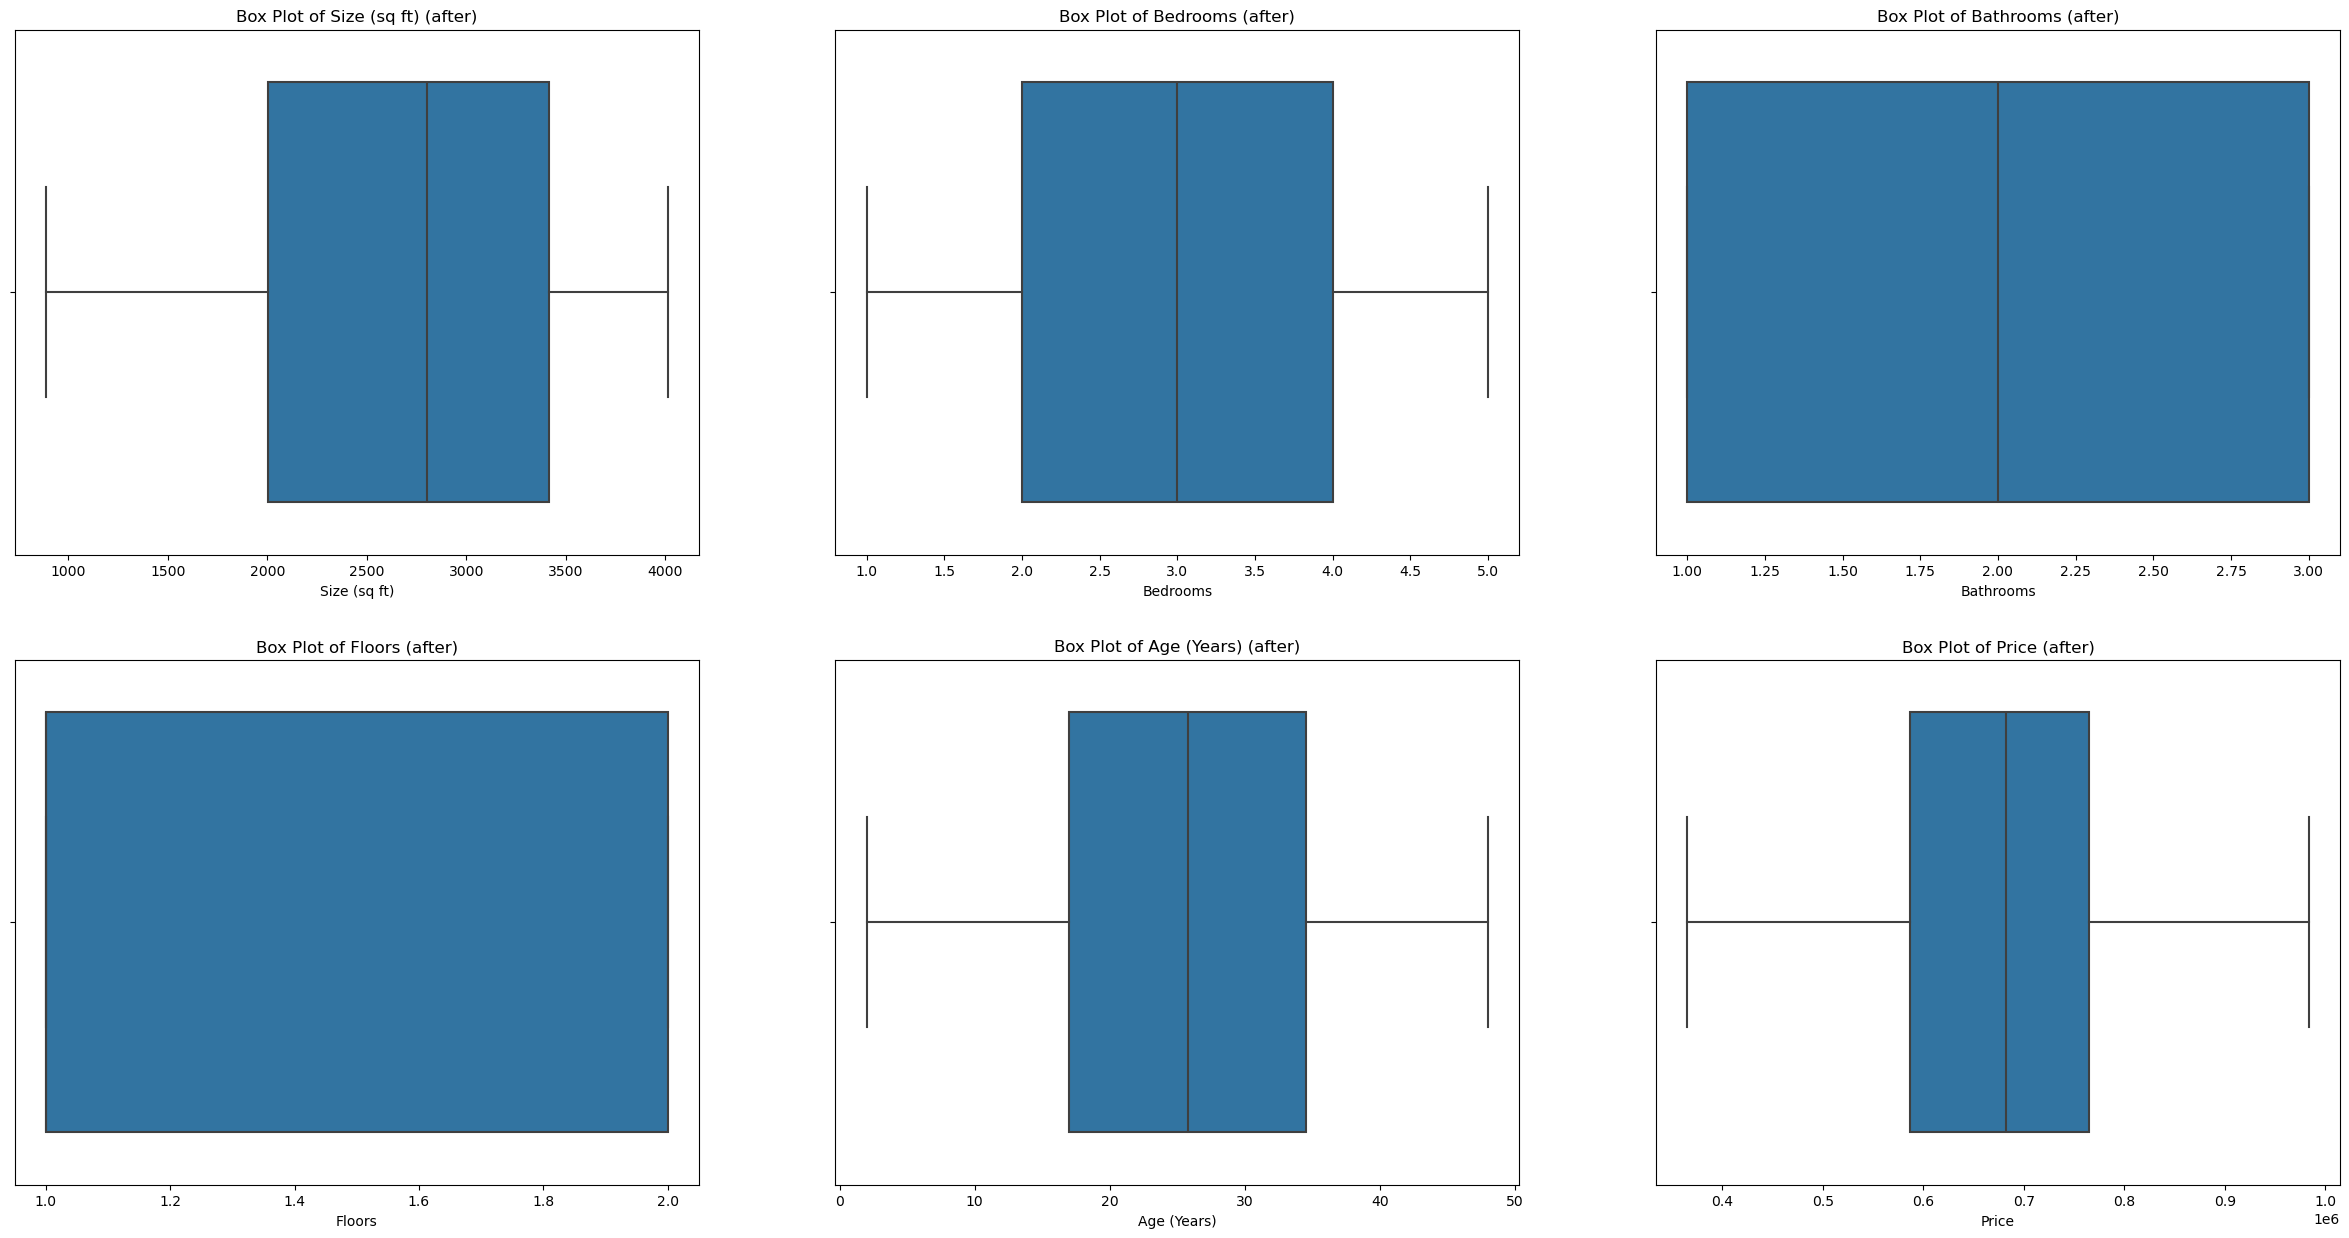

In [320]:
import seaborn as sns
columns = ['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Floors', 'Age (Years)', 'Price']
fig, axes = plt.subplots(2, 3, figsize = (30, 15))
axes = axes.flatten()
for i, j in enumerate(columns):
    sns.boxplot(x = new_df[j], ax = axes[i])
    axes[i].set_title(f"Box Plot of {j} (after)")


<h4> Handling Categorical Data</h4>

In [283]:
new_df.select_dtypes(include = ['object', 'category']).columns

Index(['City'], dtype='object')

In [284]:
new_df['City'].unique()

array(['San Francisco', 'Chicago', 'Los Angeles', 'New York'],
      dtype=object)

In [285]:
city_index = list(new_df.columns).index('City')
city_index

5

In [286]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_df.iloc[:, city_index] = encoder.fit_transform(new_df.iloc[:, city_index].astype(str))

In [297]:
x = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 1)

<h4> Feature Scaling </h4>

In [299]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [307]:
print(f"{X_train[:10]} \n\n{X_test[:10]}, \n\n{y_train[:10]} \n\n{y_test[:10]}")

[[-1.71667766 -0.79705274 -1.48625749 -0.09759462 -1.06561599  1.41927995]
 [-1.20548157  0.01549858 -1.48625749 -0.94223166 -0.43284922 -0.28887999]
 [ 0.29197501  0.01549858 -1.48625749 -0.94223166 -0.25205872 -1.14295996]
 [ 0.15815405 -1.60960407  1.10451455  1.10902973 -1.6079875   1.41927995]
 [ 1.36254273  0.8280499  -0.19087147  1.10902973  1.10387006 -1.14295996]
 [ 1.428115   -0.79705274  1.10451455 -0.94223166 -1.6079875  -0.28887999]
 [ 0.06314117  1.64060122 -0.19087147 -0.94223166 -0.07126822 -1.14295996]
 [ 0.08624847  1.64060122 -1.48625749  1.10902973 -0.79443023 -1.14295996]
 [-1.20146694 -0.79705274 -0.17817161 -0.94223166 -0.70403498 -1.14295996]
 [ 0.23710842  0.01549858 -0.19087147 -0.94223166 -0.88482548 -0.28887999]] 

[[ 1.77738771 -1.60960407  1.10451455  1.10902973  1.64624157 -0.28887999]
 [ 1.21266325  0.8280499  -1.48625749  1.10902973  1.01347481 -0.28887999]
 [ 0.08624847 -0.79705274 -0.19087147 -0.94223166 -0.43284922  1.41927995]
 [ 0.37895864  0.82804